In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np

In [16]:
def get_dfs(path: str, seed: int):
    experiments = os.listdir(path)
    dfs = {(exp.split("_")[1], exp.split("_")[3]): pd.read_csv(os.path.join(path, exp, f"{seed}", "network_log.csv")) for exp in experiments if (not exp.startswith(".") and not exp.endswith(".pdf"))}
    return dfs

In [3]:
def get_metrics(dfs):
    switch_errors = {k: df.log_generalisation_error_0[14999] for k, df in dfs.items()}
    final_errors = {k: df.log_generalisation_error_0[29999] for k, df in dfs.items()}
    switch_errors_1 = {k: df.log_generalisation_error_1[14999] for k, df in dfs.items()}
    final_errors_1 = {k: df.log_generalisation_error_1[29999] for k, df in dfs.items()}
    forgetting = {k: df.log_generalisation_error_0[29999] - df.log_generalisation_error_0[14999] for k, df in dfs.items()}
    forgetting_rate = {k: np.mean([df.log_generalisation_error_0[14999 + i + 1] - df.log_generalisation_error_0[14999 + i] for i in range(10)]) for k, df in dfs.items()}
    max_forgetting = {k: np.amax(df.log_generalisation_error_0[14999:]) - df.log_generalisation_error_0[14999] for k, df in dfs.items()}
    second_threshold_steps = {k: np.where(df.log_generalisation_error_1 < switch_errors[k])[0][0] for k, df in dfs.items()}
    adjusted_forgetting = {k: df.log_generalisation_error_0[second_threshold_steps[k]] - df.log_generalisation_error_0[14999] for k, df in dfs.items()}
    transfer = {k: df.log_generalisation_error_1[14999] - df.log_generalisation_error_1[29999] for k, df in dfs.items()}
    transfer_rate = {k: np.mean([df.log_generalisation_error_1[14999 + i] - df.log_generalisation_error_1[14999 + i + 1] for i in range(10)]) for k, df in dfs.items()}
    max_transfer = {k: df.log_generalisation_error_1[14999] - np.amin(df.log_generalisation_error_1[14999:]) for k, df in dfs.items()}
    return forgetting, forgetting_rate, max_forgetting, adjusted_forgetting, transfer, transfer_rate, max_transfer

In [24]:
def get_2d_plot_base(sample_metric):
    x, y = np.meshgrid(np.linspace(0, 1, 11), np.linspace(0, 1, 11))
    unique_sorted_keys = np.unique([i[0] for i in sorted(list(sample_metric.keys()), key=lambda x: float(x[0]))])
    x_overlap_map = {v: i for i, v in enumerate(unique_sorted_keys)}
    y_overlap_map = {v: i for i, v in enumerate(np.unique([i[1] for i in sorted(list(sample_metric.keys()), key=lambda x: float(x[1]))]))}
    return x_overlap_map, y_overlap_map

In [25]:
def get_z(value_dict):
    z = np.zeros((11, 11))
    
    x_overlap_map, y_overlap_map = get_2d_plot_base(value_dict)

    for k, f_value in value_dict.items():
        x_val = k[0]
        y_val = k[1]
        x_index = x_overlap_map[x_val]
        y_index = y_overlap_map[y_val]
        z[x_index][y_index] = f_value
    return z

In [5]:
def plot2d(metric, metric_title, cmap):
    fig = plt.figure()
    plt.imshow(get_z(metric), origin="lower", extent=[0, 1, 0, 1], cmap=cmap)
    plt.xlabel("Feature Similarity")
    plt.ylabel("Readout Similarity")
    plt.title(metric_title)
#     plt.tick_params(
#                 axis='both',         # changes apply to the x-axis
#                 which='both',      # both major and minor ticks are affected
#                 bottom=False,      # ticks along the bottom edge are off
#                 top=False,         # ticks along the top edge are off
#                 labelbottom=False, # labels along the bottom edge are off
#                 left=False,
#                 labelleft=False
#             ) 
    plt.colorbar()
    fig.show()
    # fig.savefig(os.path.join(result_folder, "aggregate_forgetting_no_label.pdf"), dpi=100, bbox_inches='tight', pad_inches=0)

In [56]:
def plot2d_mean(metrics, metric_title, cmap):
    zs = [get_z(metric) for metric in metrics]
    average_z = np.mean(zs, axis=0)
    fig = plt.figure()
    plt.imshow(average_z, origin="lower", extent=[0, 1, 0, 1], cmap=cmap)
    plt.xlabel("Feature Similarity")
    plt.ylabel("Readout Similarity")
    plt.title(metric_title)
#     plt.tick_params(
#                 axis='both',         # changes apply to the x-axis
#                 which='both',      # both major and minor ticks are affected
#                 bottom=False,      # ticks along the bottom edge are off
#                 top=False,         # ticks along the top edge are off
#                 labelbottom=False, # labels along the bottom edge are off
#                 left=False,
#                 labelleft=False
#             ) 
    plt.colorbar()
    fig.show()
    # fig.savefig(os.path.join(result_folder, "aggregate_forgetting_no_label.pdf"), dpi=100, bbox_inches='tight', pad_inches=0)

In [44]:
seed_0_dfs = get_dfs( "../run/results/eleven_by_eleven/", 0)
seed_5_dfs = get_dfs( "../run/results/seed_5_eleven/", 5)
seed_10_dfs = get_dfs( "../run/results/seed_10_eleven/", 10)

In [18]:
seed_0_forgetting, seed_0_forgetting_rate, seed_0_max_forgetting, seed_0_adjusted_forgetting, seed_0_transfer, seed_0_transfer_rate, seed_0_max_transfer = get_metrics(seed_0_dfs)

In [45]:
seed_5_forgetting, seed_5_forgetting_rate, seed_5_max_forgetting, seed_5_adjusted_forgetting, seed_5_transfer, seed_5_transfer_rate, seed_5_max_transfer = get_metrics(seed_5_dfs)

In [19]:
seed_10_forgetting, seed_10_forgetting_rate, seed_10_max_forgetting, seed_10_adjusted_forgetting, seed_10_transfer, seed_10_transfer_rate, seed_10_max_transfer = get_metrics(seed_10_dfs)

<ipython-input-5-6aa8e8e9361f>:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


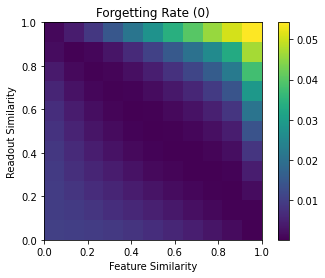

In [26]:
plot2d(seed_0_forgetting_rate, "Forgetting Rate (0)", "viridis")

<ipython-input-5-6aa8e8e9361f>:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


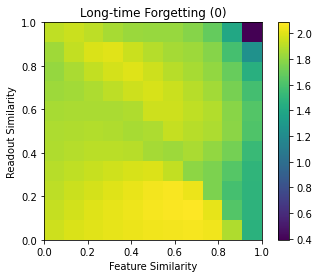

In [29]:
plot2d(seed_0_adjusted_forgetting, "Long-time Forgetting (0)", "viridis")

<ipython-input-5-6aa8e8e9361f>:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


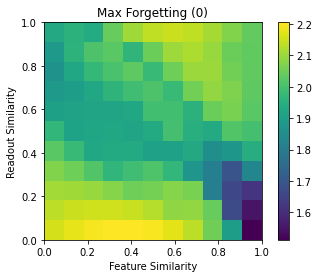

In [33]:
plot2d(seed_0_max_forgetting, "Max Forgetting (0)", "viridis")

<ipython-input-5-6aa8e8e9361f>:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


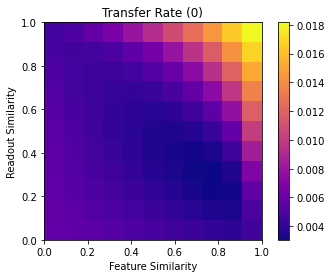

In [31]:
plot2d(seed_0_transfer_rate, "Transfer Rate (0)", "plasma")

<ipython-input-5-6aa8e8e9361f>:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


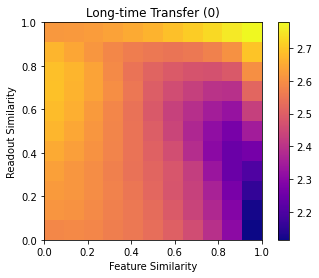

In [32]:
plot2d(seed_0_transfer, "Long-time Transfer (0)", "plasma")

<ipython-input-5-6aa8e8e9361f>:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


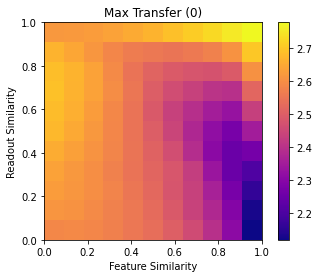

In [34]:
plot2d(seed_0_max_transfer, "Max Transfer (0)", "plasma")

<ipython-input-5-6aa8e8e9361f>:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


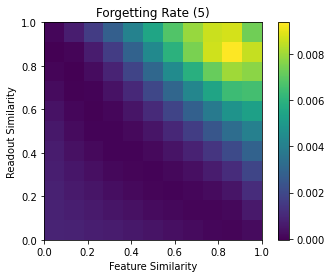

In [47]:
plot2d(seed_5_forgetting_rate, "Forgetting Rate (5)", "viridis")

<ipython-input-5-6aa8e8e9361f>:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


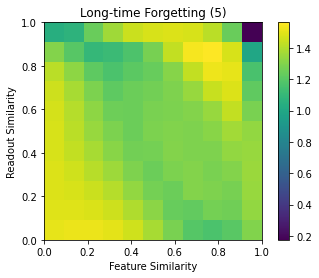

In [48]:
plot2d(seed_5_adjusted_forgetting, "Long-time Forgetting (5)", "viridis")

<ipython-input-5-6aa8e8e9361f>:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


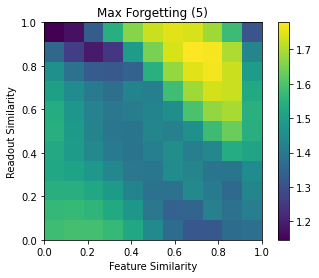

In [49]:
plot2d(seed_5_max_forgetting, "Max Forgetting (5)", "viridis")

<ipython-input-5-6aa8e8e9361f>:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


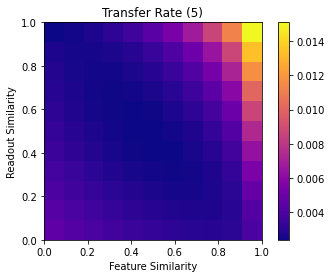

In [50]:
plot2d(seed_5_transfer_rate, "Transfer Rate (5)", "plasma")

<ipython-input-5-6aa8e8e9361f>:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


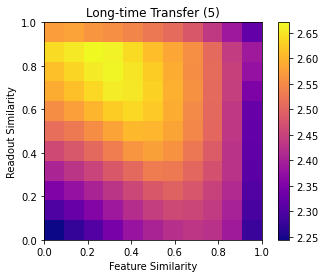

In [51]:
plot2d(seed_5_transfer, "Long-time Transfer (5)", "plasma")

<ipython-input-5-6aa8e8e9361f>:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


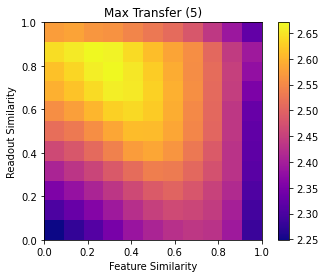

In [52]:
plot2d(seed_5_max_transfer, "Max Transfer (5)", "plasma")

<ipython-input-5-6aa8e8e9361f>:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


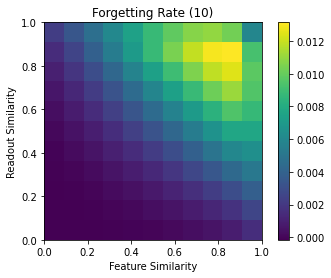

In [35]:
plot2d(seed_10_forgetting_rate, "Forgetting Rate (10)", "viridis")

<ipython-input-5-6aa8e8e9361f>:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


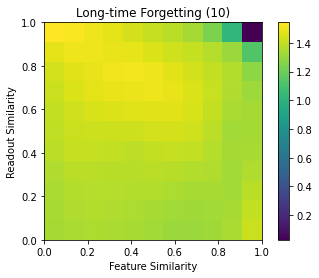

In [36]:
plot2d(seed_10_adjusted_forgetting, "Long-time Forgetting (10)", "viridis")

<ipython-input-5-6aa8e8e9361f>:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


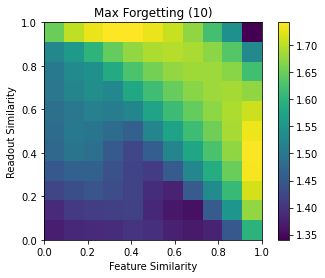

In [37]:
plot2d(seed_10_max_forgetting, "Max Forgetting (10)", "viridis")

<ipython-input-5-6aa8e8e9361f>:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


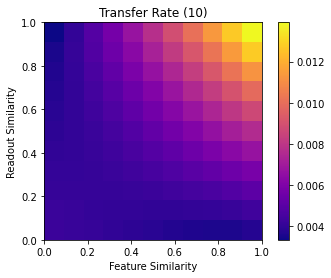

In [38]:
plot2d(seed_10_transfer_rate, "Transfer Rate (10)", "plasma")

<ipython-input-5-6aa8e8e9361f>:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


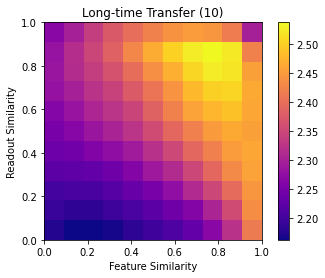

In [39]:
plot2d(seed_10_transfer, "Long-time Transfer (10)", "plasma")

<ipython-input-5-6aa8e8e9361f>:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


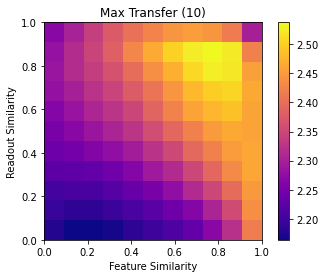

In [40]:
plot2d(seed_10_max_transfer, "Max Transfer (10)", "plasma")

<ipython-input-56-ab8d4860aa38>:19: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


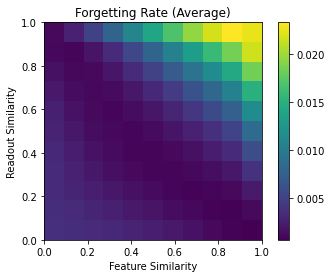

In [57]:
plot2d_mean([seed_0_forgetting_rate, seed_5_forgetting_rate, seed_10_forgetting_rate], "Forgetting Rate (Average)", "viridis")

<ipython-input-56-ab8d4860aa38>:19: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


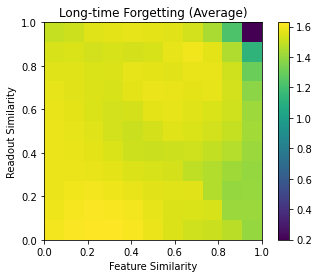

In [64]:
plot2d_mean([seed_0_adjusted_forgetting, seed_5_adjusted_forgetting, seed_10_adjusted_forgetting], "Long-time Forgetting (Average)", "viridis")

<ipython-input-56-ab8d4860aa38>:19: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


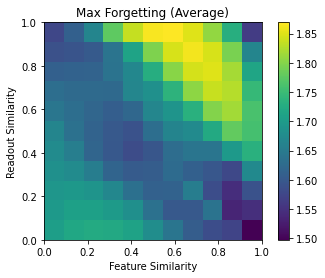

In [59]:
plot2d_mean([seed_0_max_forgetting, seed_5_max_forgetting, seed_10_max_forgetting], "Max Forgetting (Average)", "viridis")

<ipython-input-56-ab8d4860aa38>:19: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


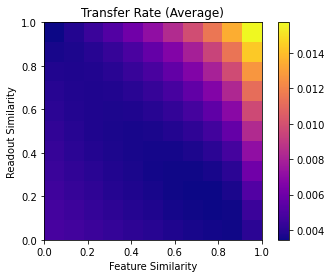

In [62]:
plot2d_mean([seed_0_transfer_rate, seed_5_transfer_rate, seed_10_transfer_rate], "Transfer Rate (Average)", "plasma")

<ipython-input-56-ab8d4860aa38>:19: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


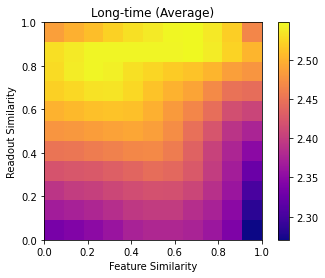

In [63]:
plot2d_mean([seed_0_transfer, seed_5_transfer, seed_10_transfer], "Long-time (Average)", "plasma")

<ipython-input-56-ab8d4860aa38>:19: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


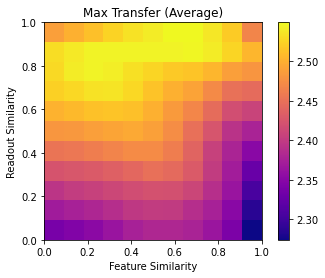

In [60]:
plot2d_mean([seed_0_max_transfer, seed_5_max_transfer, seed_10_max_transfer], "Max Transfer (Average)", "plasma")